In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn import metrics
from sklearn import model_selection

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

In [4]:
quality_map = {
    3 : 0,
    4 : 1,
    5 : 2,
    6 : 3,
    7 : 4,
    8 : 5
}
data.loc[:, 'quality'] = data.quality.map(quality_map)

In [5]:
data = data.sample(frac=1).reset_index(drop=True)

df_train = data.head(1000)
df_test = data.tail(599)

In [6]:
columns = data.drop('quality', axis=1).columns.tolist()

In [7]:
# Decision Tree - max depth = 3

clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(df_train[columns], df_train.quality)

train_prediction = clf.predict(df_train[columns])
test_prediction = clf.predict(df_test[columns])

train_accuracy = metrics.accuracy_score(df_train.quality, train_prediction)
test_accuracy = metrics.accuracy_score(df_test.quality, test_prediction)

print('Train accuracy for max depth 3 - ', format(train_accuracy*100))
print('Test accuracy for max depth 3 - ', format(test_accuracy*100))

Train accuracy for max depth 3 -  58.699999999999996
Test accuracy for max depth 3 -  54.59098497495827


In [8]:
# Decision Tree - max depth = 10

clf = tree.DecisionTreeClassifier(max_depth=10)
clf.fit(df_train[columns], df_train.quality)

train_prediction = clf.predict(df_train[columns])
test_prediction = clf.predict(df_test[columns])

train_accuracy = metrics.accuracy_score(df_train.quality, train_prediction)
test_accuracy = metrics.accuracy_score(df_test.quality, test_prediction)

print('Train accuracy for max depth 3 - ', format(train_accuracy*100))
print('Test accuracy for max depth 3 - ', format(test_accuracy*100))

Train accuracy for max depth 3 -  88.8
Test accuracy for max depth 3 -  61.93656093489148


In [9]:
train_accuracy_list = []
test_accuracy_list = []

for i in range(1, 25):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf.fit(df_train[columns], df_train.quality)

    train_prediction = clf.predict(df_train[columns])
    test_prediction = clf.predict(df_test[columns])

    train_accuracy = metrics.accuracy_score(df_train.quality, train_prediction)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_prediction)

    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)

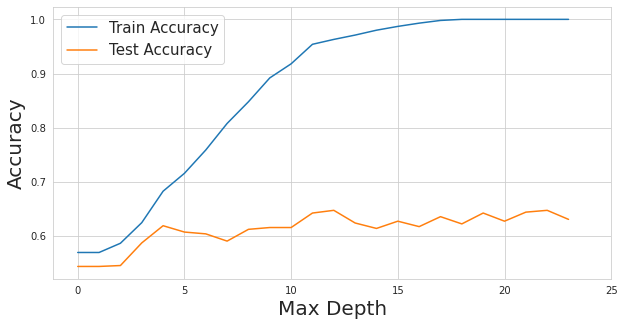

In [10]:
# Plot Accuracy

plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
plt.plot(train_accuracy_list, label='Train Accuracy')
plt.plot(test_accuracy_list, label='Test Accuracy')
plt.legend(loc='upper left', prop={'size':15})
plt.xticks(range(0, 26, 5))
plt.xlabel('Max Depth', size=20)
plt.ylabel('Accuracy', size=20)
plt.show()

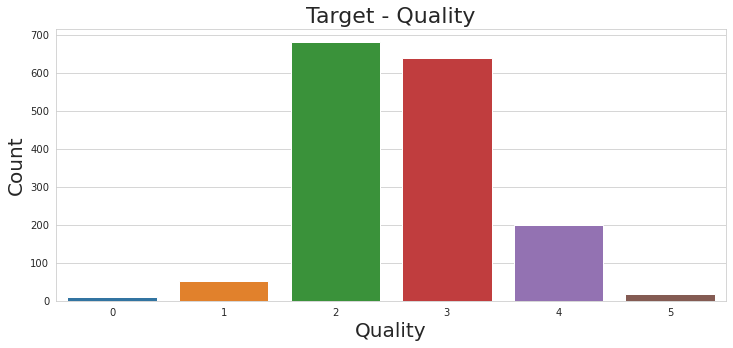

In [11]:
plt.figure(figsize=(12, 5))
sns.set_style('whitegrid')
sns.countplot(data.quality)
# plt.legend('upper-left', prop={'size':15})
plt.xlabel('Quality', size=20)
plt.ylabel('Count' ,size=20)
plt.title('Target - Quality', fontsize=22)
plt.show()

In [12]:
def kfold(df, target_col='quality', nfold=3):
    
    df['fold'] = -1
    
    X = df.drop(target_col, axis=1)
    Y = df[target_col]
    
    kf = model_selection.StratifiedKFold(n_splits=nfold)
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(X, Y)):
        
        df.loc[val_idx, 'fold'] = fold
    
    return df

In [13]:
fold_cnt = 4
data = kfold(data, 'quality', fold_cnt)

In [14]:
def train_model(df_train, df_test, fold, columns):
    train_accuracy_list = []
    test_accuracy_list = []

    for i in range(1, 25):
        clf = tree.DecisionTreeClassifier(max_depth=i)
        clf.fit(df_train[columns], df_train.quality)

        train_prediction = clf.predict(df_train[columns])
        test_prediction = clf.predict(df_test[columns])

        train_accuracy = metrics.accuracy_score(df_train.quality, train_prediction)
        test_accuracy = metrics.accuracy_score(df_test.quality, test_prediction)

        train_accuracy_list.append(train_accuracy)
        test_accuracy_list.append(test_accuracy)
    
    accuracy_graph(train_accuracy_list, test_accuracy_list, fold)
    
    

In [15]:
def accuracy_graph(train_accuracy_list, test_accuracy_list, fold):
    # Plot Accuracy

    plt.figure(figsize=(10, 5))
    sns.set_style('whitegrid')
    plt.plot(train_accuracy_list, label='Train Accuracy')
    plt.plot(test_accuracy_list, label='Test Accuracy')
    plt.legend(loc='upper left', prop={'size':15})
    plt.xticks(range(0, 26, 5))
    plt.xlabel('Max Depth', size=20)
    plt.ylabel('Accuracy', size=20)
    plt.title('Fold - {}'.format(fold), fontsize=22)
    plt.show()

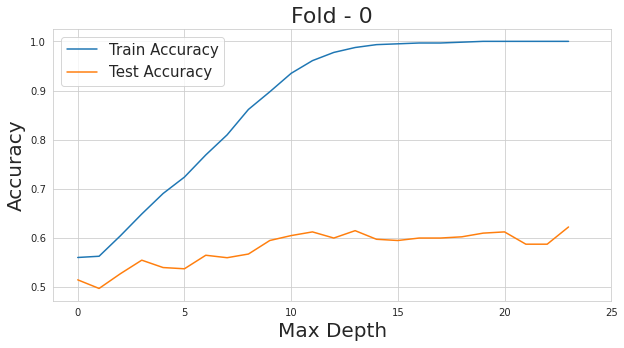

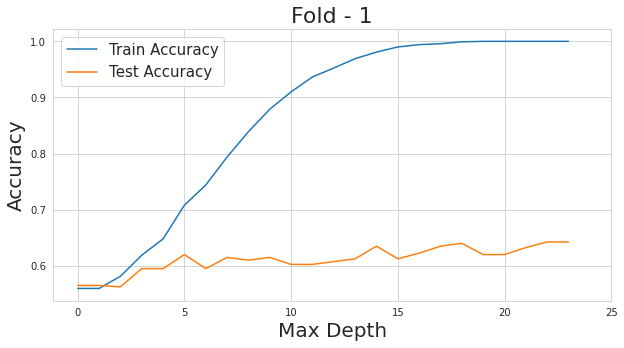

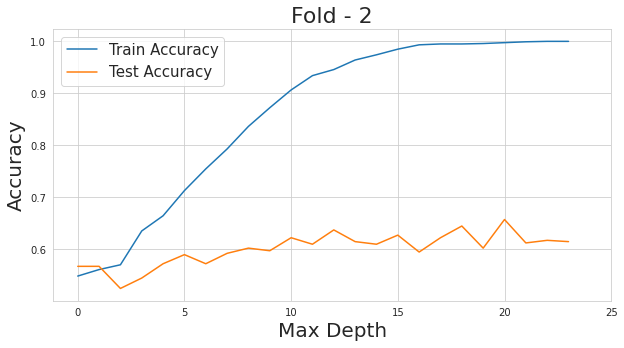

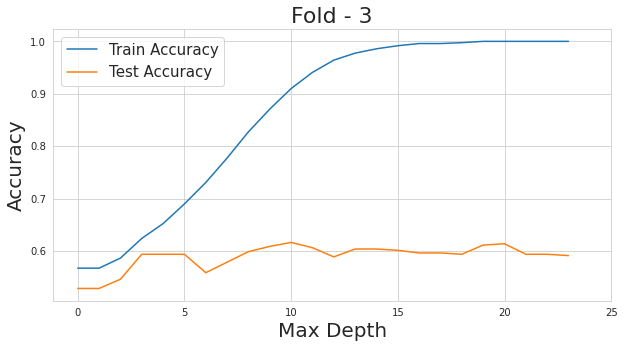

In [16]:
for i in range(fold_cnt):
    df_train = data[data.fold != i]
    df_test = data[data.fold == i]
    train_model(df_train, df_test, i, columns)